In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('POS_IDENTIFCIATION_CAMPAGNE_STAT.xlsx')
df.head()

,CUST_ID,CHNL,STS_DBSS,STS_DWH_DT,ACT_DT,FC_DT,LC_DT,TER_DT,<CASE expression>,POS_ID_,...,DOC_VAL_3G,DOC_VAL_4G,DOC_VAL_DT,BRNG_STS,DOC_STMP,DOC_SCN_DT,DOC_SCN_SRC_ID,RSLR_,REVENUE_LAST_2_MONTHS,REVENUE_LAST_12_MONTHS
0,338024444,POS,TER,2021-11-03,2021-05-30 13:42:49,2021-06-03 20:30:17,2021-07-05 20:00:17,2021-11-03 06:14:30,USIM,8004200,...,NO,YES,2021-05-30 12:42:46,OFF,YES,2021-05-30 13:42:45,CSRTOOLBOX,\N,250.0,250.0
1,337522281,POS,TER,2021-11-04,2021-04-10 09:24:01,2021-04-10 11:53:39,2021-07-27 22:25:26,2021-11-04 15:44:20,USIM,H218000,...,NO,YES,2021-04-10 08:23:23,OFF,YES,2021-04-10 09:23:23,CSRTOOLBOX,\N,250.0,250.0
2,329619296,POS,TER,2019-12-13,2019-09-12 14:42:12,2019-09-12 22:45:46,2019-09-13 20:21:10,2019-12-13 05:09:39,USIM,C906000,...,NO,YES,2019-09-12 14:42:09,OFF,YES,2019-09-12 14:42:09,CSRTOOLBOX,C906000,250.0,250.0
3,324989629,SMS888,TER,2019-08-29,2019-02-12 17:59:16,2019-02-13 15:38:50,2019-03-26 19:32:08,2019-08-29 15:47:02,USIM,40540525000,...,NO,YES,2019-03-18 10:35:38,OFF,YES,2019-06-19 18:03:33,FILENET (DBSS),40540525000,250.0,250.0
4,230792674,SNOC,TER,2019-01-06,2018-01-24 01:00:00,2018-01-24 19:36:22,2018-10-07 15:23:20,2019-01-06 05:19:53,USIM,43760534012,...,NO,NO,NaN,OFF,NO,NaT,NaN,NaN,250.0,250.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CUST_ID                 100000 non-null  int64         
 1   CHNL                    95358 non-null   object        
 2   STS_DBSS                100000 non-null  object        
 3   STS_DWH_DT              100000 non-null  datetime64[ns]
 4   ACT_DT                  100000 non-null  datetime64[ns]
 5   FC_DT                   97927 non-null   datetime64[ns]
 6   LC_DT                   97927 non-null   datetime64[ns]
 7   TER_DT                  100000 non-null  object        
 8   <CASE  expression>      99971 non-null   object        
 9   POS_ID_                 97869 non-null   object        
 10  DOB                     99681 non-null   object        
 11  GNDR                    100000 non-null  object        
 12  ID_TYPE                 99659 n

In [4]:
revenue_parRegion = df.groupby('BU')['REVENUE_LAST_12_MONTHS'].agg('sum').reset_index(name='Revenue par region')
revenue_parRegion

,BU,Revenue par region
0,ALGER,44065976.07
1,CENTRE,47288367.94
2,CONSTANTINE,44469821.00
3,ORAN,57705164.07
4,SETIF,44015476.86
5,SUD,13888221.62
6,TLEMCEN,16839132.73


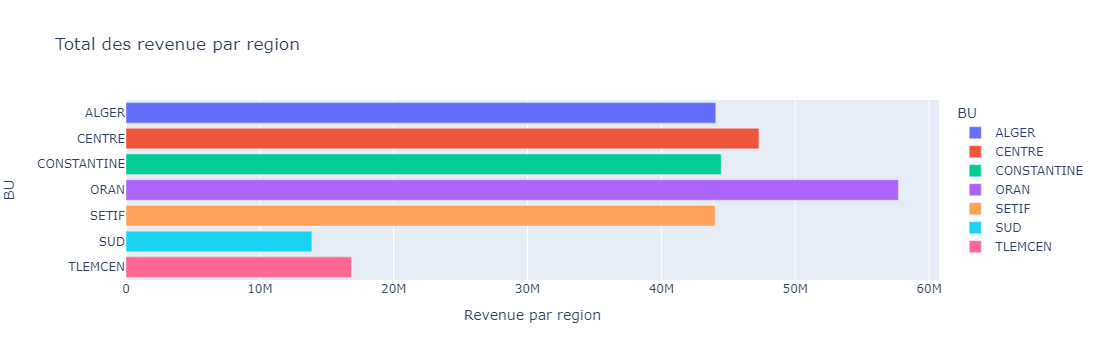

In [5]:
## Visualisation du total des revenue par region::
bar_fig  = px.bar(
    data_frame = revenue_parRegion, x='Revenue par region' , y='BU', color='BU', orientation= 'h', title= 'Total des revenue par region'
)
#bar_fig.update_layout({'bargap': 0.5})
bar_fig.show()

In [6]:
## Nombre des clients identifiés par an::

df['DOC_VAL_DT'] = pd.to_datetime(df['DOC_VAL_DT'], errors='coerce')
##Netoyage::
invalid_dates = df[pd.isnull(df['DOC_VAL_DT'])]
##print("Dates invalides :")
#print(df.head())

df.dropna(subset=['DOC_VAL_DT'], inplace=True)

df['Année d identification'] = df['DOC_VAL_DT'].dt.year
clients_par_année = df.groupby('Année d identification')['CUST_ID'].count()
print(clients_par_année)

Année d identification
1899        1
1900     2650
1946        1
1956        1
1964        2
1968        1
1970        1
1971        1
1973        1
1974        1
1976        1
1977        1
1979        2
1980        2
1981        1
1983        1
1984        3
1987        1
1988        2
1990        2
1992        1
1993        2
1994        1
2000        1
2001        1
2002        1
2004        4
2006        4
2007        1
2008        1
2009      249
2010     1856
2011     2246
2012     1670
2013     1651
2014     1521
2015     2455
2016     3087
2017     5061
2018    12348
2019    19415
2020    10082
2021     9862
2022    10038
2023     7623
2106        1
2107        1
Name: CUST_ID, dtype: int64


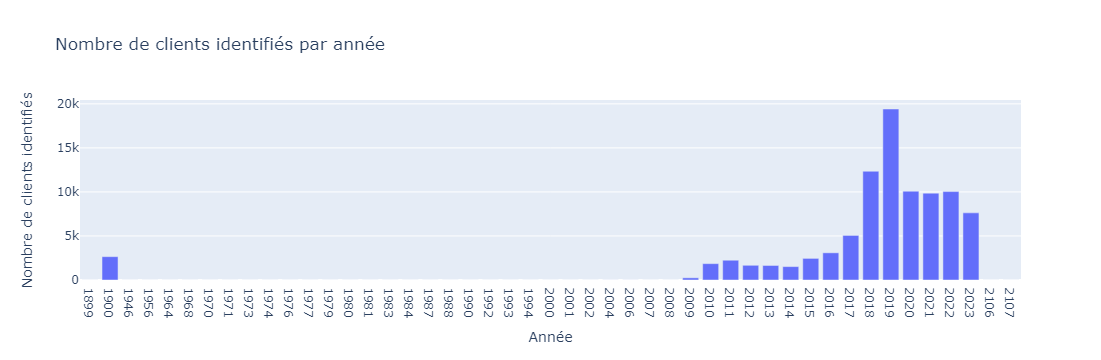

In [7]:
bar_fig2  = px.bar(
    x= clients_par_année.index,
    y=clients_par_année.values,
    labels={'x':'Année', 'y':'Nombre de clients identifiés'},
    title= 'Nombre de clients identifiés par année'
)
bar_fig2.update_xaxes(type='category')
bar_fig2.show()

In [8]:
import webbrowser
webbrowser.open_new('http://127.0.0.1:8080/')

import dash
from dash import dcc
from dash import html
app = dash.Dash(__name__)
app.layout = html.Div(
children = [
    html.H1("Total des revenue par region"),
    html.Div( dcc.Graph(figure=bar_fig)),

    html.H2("Nombre de clients identifiés par année"),
    html.Div(dcc.Graph(figure=bar_fig2)),
]
)
if __name__ == '__main__':
    app.run_server(debug=True, mode='external', port=8080)

Une tentative d’accès à un socket de manière interdite par ses autorisations d’accès a été tentée


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [2]:
import folium
from geopy.geocoders import Nominatim
import pandas as pd
from folium.plugins import MiniMap


def get_marker_color(non_identifies):
    if non_identifies >= 100:
        return "red"  # Marqueurs verts pour un faible nombre de clients non identifiés
    elif (non_identifies >= 50) and (non_identifies <= 100):
        return "orange"    # Marqueurs rouges pour un nombre élevé de clients non identifiés
    else :
        return "green"  # Marqueurs verts pour un faible nombre de clients non identifiés


# Lisez le fichier Excel contenant les données des abonnés
df = pd.read_excel('POS_IDENTIFCIATION_CAMPAGNE_STAT.xlsx', nrows=100000)
conditionIdent = (df['DOC_SCN_DT'].isna()==True) | (df['DOC_VAL_DT'].isna()==True) | ((df['DOC_VAL_2G']=='NO') & (df['DOC_VAL_3G']=='NO') & (df['DOC_VAL_4G']=='NO')) 

nonIdentif = df[conditionIdent].shape[0]
print(f"Le nombre de personnes non identifiés est : {nonIdentif}")

# Filtrage
#clients_non_identifies = (df[df['DOC_SCN_DT'].isna()==True]) | (df[df['DOC_VAL_DT'].isna()==True]) | ((df[df['DOC_VAL_2G']=='NO']) & (df[df['DOC_VAL_3G']=='NO']) & (df[df['DOC_VAL_4G']=='NO']))
conditionIdent = (df['DOC_SCN_DT'].isna()==True) | (df['DOC_VAL_DT'].isna()==True) | ((df['DOC_VAL_2G']=='NO') & (df['DOC_VAL_3G']=='NO') & (df['DOC_VAL_4G']=='NO')) 
clients_non_identifies = df[conditionIdent]
clients_identifies = df[df['DOC_SCN_DT'].isna()==False]
clients_points_vente = clients_non_identifies[(clients_non_identifies['CHNL'] == 'SNOC') | (clients_non_identifies['CHNL'] == 'SMS888')]
clients_boutiques = clients_non_identifies[clients_non_identifies['CHNL'] == 'POS']
#Par_SMS = clients_non_identifies[clients_non_identifies['CHNL'] == 'SMS888'] ##################################################
clients_boutiquesB2B = clients_non_identifies[clients_non_identifies['CHNL'] == 'SFA']
clients_NA = clients_non_identifies[clients_non_identifies['CHNL'].isna()]


# Comptez les clients non identifiés par wilaya
non_identifies_par_wilaya = clients_non_identifies.groupby('PRVC').size().reset_index(name='Non_Identifies')
identifies_par_wilaya = clients_identifies.groupby('PRVC').size().reset_index(name='Identifies')

# Comptez les clients dans des points de vente agréés par wilaya
points_vente_agrees_par_wilaya = clients_points_vente.groupby('PRVC').size().reset_index(name='Points_Vente_Agres')
B2B_par_wilaya = clients_boutiquesB2B.groupby('PRVC').size().reset_index(name='B2B')
#SMS_par_wilaya = Par_SMS.groupby('PRVC').size().reset_index(name='SMS')
boutiques_par_wilaya = clients_boutiques.groupby('PRVC').size().reset_index(name='Boutiques')
NA_wilaya = clients_NA.groupby('PRVC').size().reset_index(name='NA')

# Comptez le total de clients par wilaya
total_clients_par_wilaya = clients_non_identifies.groupby('PRVC').size().reset_index(name='Total_Clients')

# Fusionnez les données par wilaya
wilaya_data = non_identifies_par_wilaya.merge(points_vente_agrees_par_wilaya, on='PRVC', how='outer')
wilaya_data = wilaya_data.merge(identifies_par_wilaya, on='PRVC', how='outer')
wilaya_data = wilaya_data.merge(boutiques_par_wilaya, on='PRVC', how='outer')
#wilaya_data = wilaya_data.merge(SMS_par_wilaya, on='PRVC', how='outer')
wilaya_data = wilaya_data.merge(B2B_par_wilaya, on='PRVC', how='outer')
wilaya_data = wilaya_data.merge(NA_wilaya, on='PRVC', how='outer')
wilaya_data = wilaya_data.merge(total_clients_par_wilaya, on='PRVC', how='outer')

# Calculez les pourcentages
wilaya_data['Pourcentage_Non_Identifies'] = (wilaya_data['Non_Identifies'] / wilaya_data['Total_Clients']) * 100
wilaya_data['Pourcentage_Points_Vente_Agres'] = (wilaya_data['Points_Vente_Agres'] / wilaya_data['Total_Clients']) * 100
wilaya_data['Pourcentage_Boutiques'] = (wilaya_data['Boutiques'] / wilaya_data['Total_Clients']) * 100
wilaya_data['Pourcentage_B2B'] = (wilaya_data['B2B'] / wilaya_data['Total_Clients']) * 100
#wilaya_data['Pourcentage_SMS'] = (wilaya_data['SMS'] / wilaya_data['Total_Clients']) * 100
wilaya_data['Pourcentage_NA'] = (wilaya_data['NA'] / wilaya_data['Total_Clients']) * 100

# Géolocalisation
geolocator = Nominatim(user_agent="mon_geocodeur")

# Créez la carte Folium
ma_carte1 = folium.Map(location=[28.0339, 1.6596], zoom_start=6)

geo_json_data = 'dza.geojson'
folium.GeoJson(geo_json_data).add_to(ma_carte1)
# Ajoutez des marqueurs pour chaque wilaya avec les informations
for index, row in wilaya_data.iterrows():
    wilaya = row['PRVC']
    location = geolocator.geocode(f"{wilaya}, Algérie")
    if location:
        lat = location.latitude
        lon = location.longitude
        non_identifies = row['Non_Identifies']
        colorr = get_marker_color(non_identifies)
        identifies = row['Identifies']
        pourcentage_points_vente_agres = row['Pourcentage_Points_Vente_Agres']
        pourcentage_boutiques = row['Pourcentage_Boutiques']
        #pourcentage_SMS = row['Pourcentage_SMS']
        pourcentage_B2B = row['Pourcentage_B2B']
        pourcentage_NA = row['Pourcentage_NA']
        #pourcentage_NA = 100-pourcentage_points_vente_agres - pourcentage_boutiques - pourcentage_SMS - pourcentage_B2B
        #popup_text = f'{wilaya}<br> Identifiés : {identifies}<br>Non Identifiés : {non_identifies}<br>% Points de Vente Agréés : {pourcentage_points_vente_agres:.2f}%<br>% Boutiques : {pourcentage_boutiques:.2f}%<br>% Boutique B2B : {pourcentage_B2B:.2f}%<br>%N/A : {pourcentage_NA:.2f}%'
        popup_text = f""" <div style="text-align: center; font-family: Arial, sans-serif;"> <h2 style="color: blue; font-size: 18px;">{wilaya}</h2> <p style="color: green; font-size: 14px;">Nombre de Personnes Identifiés : {identifies}</p> <p style="color: red; font-size: 14px;">Nombre de Personnes Non Identifiés : {non_identifies}</p> <strong><p>% Points de Vente : {pourcentage_points_vente_agres:.2f}%</p></strong> <strong><p>% Boutiques : {pourcentage_boutiques:.2f}%</p></strong><strong> <p>% Boutique B2B : {pourcentage_B2B:.2f}%</p></strong> <strong> <p>%N/A : {pourcentage_NA:.2f}%</p></strong> </div> """

        popup_content = f""" <div style="text-align: center;"> <h2>Infos sur la Wilaya</h2>  { popup_text } </div> """

        folium.Marker([lat, lon], tooltip=wilaya, popup=folium.Popup(popup_content, max_width=300),icon =folium.Icon(color=colorr)  ).add_to(ma_carte1)
       
        

# Ajouter des marqueurs de localisation à la carte avec des couleurs basées sur le seuil



ma_carte1


Le nombre de personnes non identifiés est : 11708


In [ ]:
import webbrowser
webbrowser.open_new('http://127.0.0.1:8080/')

import dash
from dash import dcc
from dash import html
from folium import IFrame
app = dash.Dash(__name__)
ma_carte1.save('map.html')
with open('map.html', 'r') as f:
    maphtml =f.read()
app.layout = html.Div(
children = [
    html.H1("Total des revenue par region"),
    html.Div( dcc.Graph(figure=bar_fig)),

    html.H2("Nombre de clients identifiés par année"),
    html.Div(dcc.Graph(figure=bar_fig2)),

    html.H3("LA carte avec les infos"),
    html.Div(dcc.Graph(id='ma_carte1')),
    html.Div(dcc.Markdown(maphtml, dangerously_allow_html=True)),
    
    
]
)
if __name__ == '__main__':
    app.run_server(debug=True, mode='external', port=8080)

NameError: name 'bar_fig' is not defined

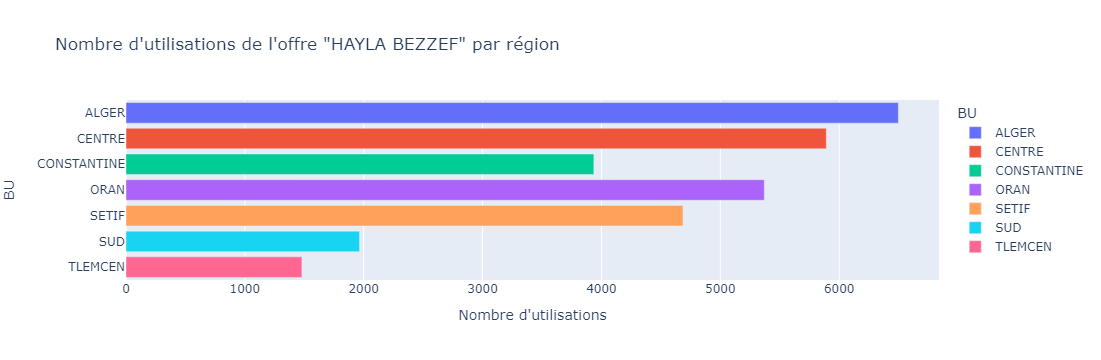

In [10]:
# Filtrer le DataFrame pour inclure uniquement l'offre "HAYLA BZEF"
offre_hayla_bzef = df[df['OFFNG_TRF_PRFL'].str.contains('HAYLA BEZZEF')]

# Créez un DataFrame avec le nombre d'utilisations de l'offre "HAYLA BZEF" par région
usage_offre_hayla_bzef_par_region = offre_hayla_bzef.groupby(['BU']).size().reset_index(name='Nombre d\'utilisations')

# Créez le graphique à barres
bar_fig_offre_hayla_bzef = px.bar(
    data_frame=usage_offre_hayla_bzef_par_region,
    x='Nombre d\'utilisations',
    y='BU',
    title='Nombre d\'utilisations de l\'offre "HAYLA BEZZEF" par région',
    color='BU'
)

bar_fig_offre_hayla_bzef.show()

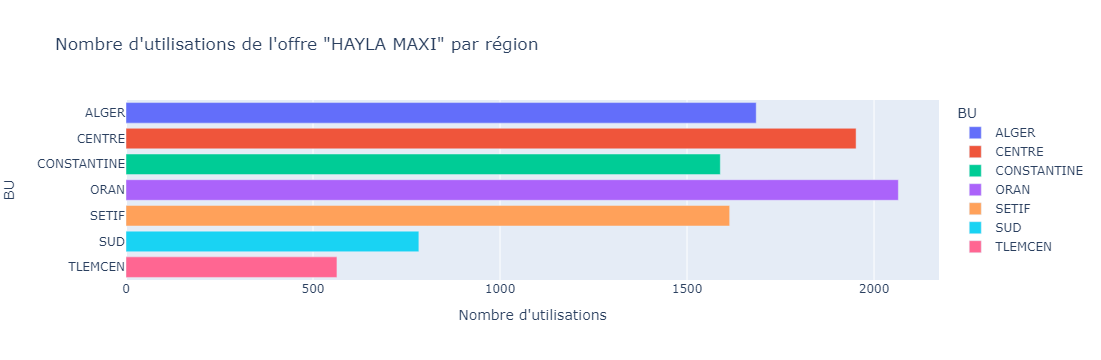

In [11]:
# Filtrer le DataFrame pour inclure uniquement l'offre "HAYLA maxi"
offre_hayla_maxi = df[df['OFFNG_TRF_PRFL'].str.contains('HAYLA MAXI')]

# Créez un DataFrame avec le nombre d'utilisations de l'offre "HAYLA maxi" par région
usage_offre_hayla_maxi_par_region = offre_hayla_maxi.groupby(['BU']).size().reset_index(name='Nombre d\'utilisations')

# Créez le graphique à barres
bar_fig_offre_hayla_maxi = px.bar(
    data_frame=usage_offre_hayla_maxi_par_region,
    x='Nombre d\'utilisations',
    y='BU',
    title='Nombre d\'utilisations de l\'offre "HAYLA MAXI" par région',
    color='BU'
)

bar_fig_offre_hayla_maxi.show()